<a href="https://colab.research.google.com/github/sudarshan-ramesh-02/Time-series-forecasting/blob/main/main_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TIME SERIES FORECASTING USING FACEBOOK PROPHET**

In [ ]:
import warnings;
warnings.simplefilter('ignore')

Install and Import Dependencies

In [ ]:
!pip install pystan==2.19.1.1
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from prophet import Prophet
import io
import matplotlib.pyplot as plt

Uploading dataset and creating a dataframe

In [ ]:
from google.colab import files
upload_file = files.upload()

Saving dataset.csv to dataset (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(upload_file['dataset.csv']))
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [ ]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


'Time Date' has dates in integer type which is unsuitable 

In [ ]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

Creating a 'Date' Column with the dates in standard YYYY-MM-DD format

In [ ]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['Date'] = pd.DatetimeIndex(df['Year'] + '-' + df['Month'] + '-' + df['Day'])

In [ ]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,Date
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [ ]:
df.tail()

,Time Date,Product,Store,Value,Year,Month,Day,Date
1075,12122020,2667437,QLD_CW_ST0203,3167.594500,2020,12,12,2020-12-12
1076,13122020,2667437,QLD_CW_ST0203,3167.594500,2020,12,13,2020-12-13
1077,14122020,2667437,QLD_CW_ST0203,3383.354511,2020,12,14,2020-12-14
1078,15122020,2667437,QLD_CW_ST0203,2714.591329,2020,12,15,2020-12-15
1079,16122020,2667437,QLD_CW_ST0203,2585.035107,2020,12,16,2020-12-16


The 'Product' and 'Store' Feature columns do not show variation (ie) only one unique value as evident below

In [ ]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


Dropping 'Product' and 'Store' as they dont show variation; dropping other columns like 'Time Date' etc as the 'Date' column in standard format has been created

Dates column named as 'ds' and value column named as 'y'

In [ ]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis = 1, inplace = True)
df.columns = ['y', 'ds']
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


Train model

In [ ]:
model = Prophet(interval_width = 0.95, daily_seasonality = True)
model.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe7kyo2d8/ignjai4w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe7kyo2d8/wiwmlkuw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70953', 'data', 'file=/tmp/tmpe7kyo2d8/ignjai4w.json', 'init=/tmp/tmpe7kyo2d8/wiwmlkuw.json', 'output', 'file=/tmp/tmpe7kyo2d8/prophet_modellw7mck0o/prophet_model-20221211115650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:56:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:56:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Predictions (for the next 100 days)



In [ ]:
future = model.make_future_dataframe(periods = 100, freq = 'D')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.070476,711.968401,3963.486075,3041.070476,3041.070476,-642.519352,-642.519352,-642.519352,466.57542,...,16.623819,16.623819,16.623819,-1125.718591,-1125.718591,-1125.718591,0.0,0.0,0.0,2398.551124
1,2018-01-02,3041.848842,728.333929,4009.875987,3041.848842,3041.848842,-652.648904,-652.648904,-652.648904,466.57542,...,-11.281075,-11.281075,-11.281075,-1107.943248,-1107.943248,-1107.943248,0.0,0.0,0.0,2389.199937
2,2018-01-03,3042.627207,973.667112,4005.529575,3042.627207,3042.627207,-626.822675,-626.822675,-626.822675,466.57542,...,-4.411502,-4.411502,-4.411502,-1088.986593,-1088.986593,-1088.986593,0.0,0.0,0.0,2415.804532
3,2018-01-04,3043.405573,867.417878,4026.151399,3043.405573,3043.405573,-579.864732,-579.864732,-579.864732,466.57542,...,22.484584,22.484584,22.484584,-1068.924735,-1068.924735,-1068.924735,0.0,0.0,0.0,2463.540841
4,2018-01-05,3044.183939,1012.891275,4037.443842,3044.183939,3044.183939,-615.887354,-615.887354,-615.887354,466.57542,...,-34.576305,-34.576305,-34.576305,-1047.886469,-1047.886469,-1047.886469,0.0,0.0,0.0,2428.296585


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,2398.551124,711.968401,3963.486075
1,2018-01-02,2389.199937,728.333929,4009.875987
2,2018-01-03,2415.804532,973.667112,4005.529575
3,2018-01-04,2463.540841,867.417878,4026.151399
4,2018-01-05,2428.296585,1012.891275,4037.443842
...,...,...,...,...
1175,2021-03-22,3722.647017,2170.739899,5152.790184
1176,2021-03-23,3706.250421,2065.921378,5272.644663
1177,2021-03-24,3721.850439,2200.315530,5477.329570
1178,2021-03-25,3754.116077,2249.817594,5334.193948


Plots to analyze trends

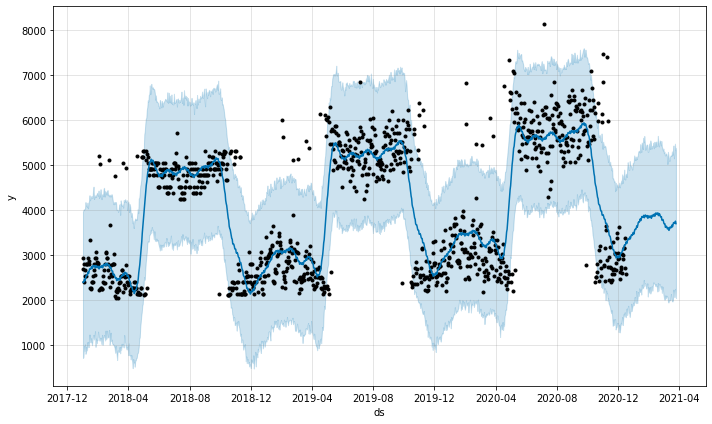

In [ ]:
fig1 = model.plot(forecast)

Plots to analyze trends corresponding to each component of the date



1. General Variation 
2. Variation daily for a week
3. Variation seasonally for a year
4. Variation hourly for a day



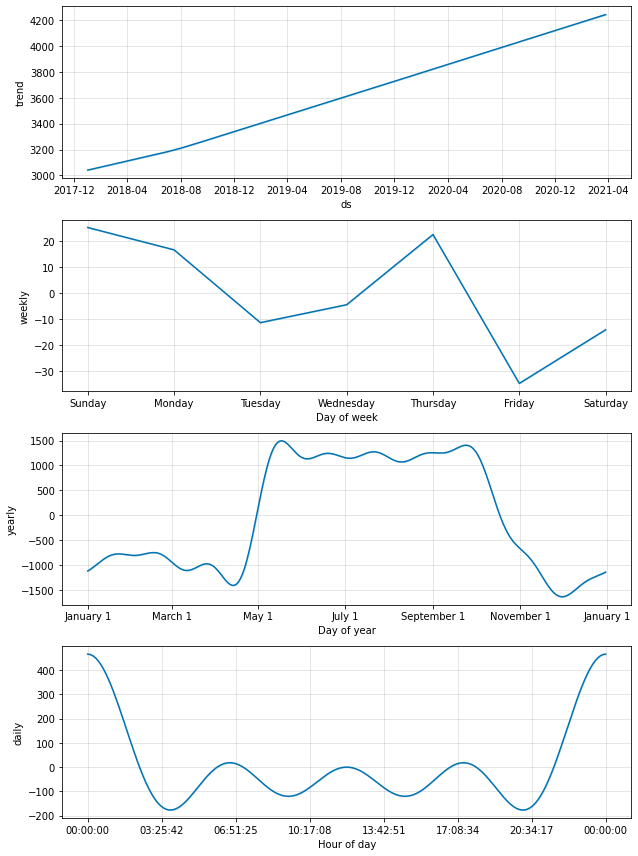

In [ ]:
fig2 = model.plot_components(forecast)